In [1]:
import os
import matplotlib.pyplot as plt

from model import (
    SocietyConstantsEnergyPrices,
    GovernmentMixedStrategy,
    GovernmentBuildChargingStation,
    GovernmentProvidesSubsidies,
    CV,
    EV,
    PHEV,
    Car_EV
)
from model.utils import (
    get_trajectories,
    common_params,
    plot_intervals,
    check_by,
    plot_check_by,
)

In [2]:
# plt.style.use("dark_background")
# plt.rc("grid", alpha=0.3)

In [3]:
MC = 50
T = 12 * 30

N = common_params["kwargs"]["population"]

param = "government"
class Gov1(GovernmentMixedStrategy):
    pass
class Gov2(GovernmentMixedStrategy):
    pass
class Gov3(GovernmentMixedStrategy):
    pass

param_list = [
    GovernmentBuildChargingStation(),
    GovernmentMixedStrategy(),
    GovernmentProvidesSubsidies(),
]


In [4]:
common_params["kwargs"]["initial_public_chargers"] = 60
common_params["kwargs"]

{'alpha': 0.01,
 'car_price_noise': <function model.utils.common_params.<lambda>()>,
 'city_size': (54, 54),
 'corporation_margin': 0.2,
 'corporation_technological_progress': 0.004,
 'energy_price': 600,
 'energy_factor': 1,
 'fuel_price': 6,
 'government': <model.Government.GovernmentBuildChargingStation at 0x7f1716c93e90>,
 'initial_public_chargers': 60,
 'initial_time': (2015, 1),
 'nerby_radius': 1,
 'population': 3000}

In [5]:
values = check_by(
    SocietyConstantsEnergyPrices,
    common_params["kwargs"],
    param,
    param_list,
    T,
    MC,
    4,
)

100%|██████████| 3/3 [03:00<00:00, 60.09s/it]


Text(0.5, 1.0, 'PHEV')

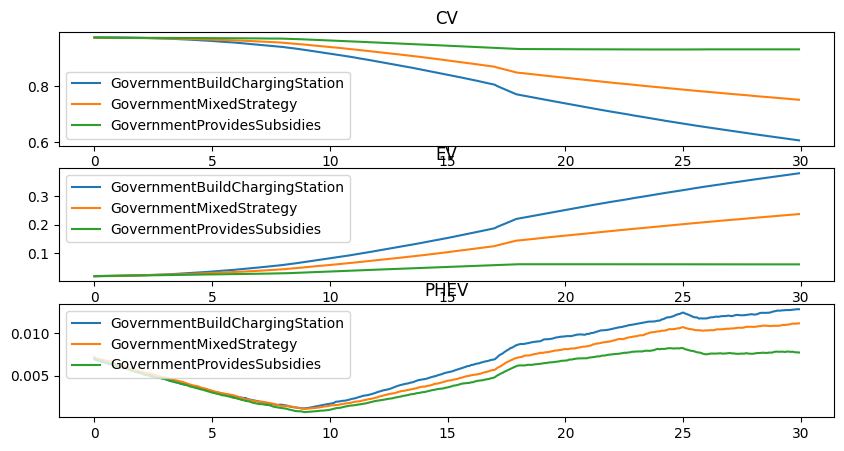

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 5))
plot_check_by(values, axs)

for ax in axs:
    ax.legend()
axs[0].set_title(CV)
axs[1].set_title(EV)
axs[2].set_title(PHEV)

In [7]:
# fig, axs = plt.subplots(nrows=3, figsize=(10, 9))

# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in CVs],
#     ax=axs[0],
#     color="c",
#     label="CV",
#     alpha=0.3,
# )
# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in EVs],
#     ax=axs[1],
#     color="m",
#     label="EV",
#     alpha=0.3,
# )
# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in PHEVs],
#     ax=axs[2],
#     color="y",
#     label="PHEV",
#     alpha=0.3,
# )


# axs[0].legend()
# axs[1].legend()
# axs[2].legend()

# axs[0].set_title("CV")
# axs[1].set_title("EV")
# axs[2].set_title("PHEV")

# fig.suptitle("constatnt prices, government build chargers stations", fontsize=16)